## <font color='blue' face='Helvetica'>Introduction to Natural Language Processing</font>

<font color='crimson'>**Objective:** use speech and words along with computer run algorithms.

<span style="font-family:Calibri; color:darkblue; font-size:18pt;">Examples of projects/research with NLP:</span>

<font color='blue'>*Sentiment Analysis*</font> - How positive or negative is text about a topic?

<font color='blue'>*Prediction*</font> - What genres should Netflix classify a movie as to maximize views? Based on product reviews, can we predict the star rating of a product?

<font color='blue'>*Translation*</font> - Recognize words in one language to provide similar words in another.

**Playground:** https://www.deepl.com/translator


<font color='blue'>*Summarization*</font> - Take a long document and produce a shorter one (a synthesis) without losing meaningful information.


<font color='forestgreen'>**Methods:**</font> <span style="font-family:Calibri; color:red; font-size:12pt;">The main idea is to quantify the occurrence of relevant words and, based on the context, to map them into vectors. That is to say that we want to create mathematically representable quantities from words and text; they will serve as features for data analysis. One approach is separate the text data into sentences and then sentences can be used to extract (key) words and expressions.</span>

### <font color='blue'> Regular Expressions (regex) </font>

Goal: provide a language that allows us to search for different text strings.

For example, Regular Expressions (frequently called “regex”) allows us to label all tweets with a “1” if they contain the following list of words:

- college
- College of
- colleges
- The College

The idea is to detect that in all expressions above we have the same concept "college".



<font color='blue' face='Calibri' size=5pt>Examples of common REGEX patterns</font>

**[tT]**imber  - would match lower or uppercase T

**[A-Z]** - would match any capital character

**[a-z]** - would match any lowercase character

**[0-9]** - would match any single number (i.e., 9)

**[^A-Z]** - would match anything that isn’t an uppercase letter.

**\w** - would match any letter.

A comprehensive manual on regex can be found here:
https://www3.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html

###Example:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1AMHbSgq3MHcv8Q8ljnHvl5IkxTKkzGkx'
width='600px' />
<figcaption>Data from (old) Twitter</figcaption></center>
</figure>


### <font face='Calibri' color='blue' size=5pt>The Bag of Words model (BoW)</font>

**Main Goal:** use concurrences within context and counts of keywords to make predictions.

**Observation:** there are many words that do not matter (such as prepositions or definite and indefinite articles).

**Important:** each word can be translated into a binary value of occurrence.

<span style="font-family:Calibri; color:darkblue; font-size:5pt;">Analog Example:</span>

*Statement 1*: Jurassic World was the pinnacle of human achievement.

*Statement 2*: Human kind would be better without Jurassic World.


<figure>
<center>
<img src='https://drive.google.com/uc?id=1EUGNgop58BOOhFGHR3iKs5gXbrji6jEM'
width='600px' />
<figcaption>What is the difference in the statements above?</figcaption></center>
</figure>



**Method**: we discard the *stopwords* such as articles, prepositions, verbs and retain the *corpus* (important words or *roots* of important words).



A simple model based on this data:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1-uuXfXiYlmub8DauhxhYYCP2TKqfdvoB'
width='600px' />
<figcaption>The differences can be highlighted by using a count/vectorizer method</figcaption></center>
</figure>

**Main idea:** analyze differences and co-occurrencies.

**Known Problems:**

 - If some sentences are much longer in length, the vocabulary would increase and as such, the length of the vectors would increase; this is a dimensionality problem.
 - The new sentences may contain more different words from the previous sentences.
 - The vectors would also contain many zeros, thereby resulting in a sparse matrix.
 - No information on the grammatical structure or the actual ordering of the words is being used.

**Possible Solution:** Term Frequency-Inverse Document Frequency (TF-IDF)

The term frequency-inverse document frequency is a measure that quantifies the importance of a word in the context of a document or a *corpus*.

The *term-frequency* of a word is the relative frequency of the term in the context of the document.

$$\text{TF}(t,d):=\frac{\text{# of times the term appears in the document}}{\text{# of terms in the document }}$$


The *inverse document frequency* is defined as:

$$\text{IDF}(t,d):=\log\left(\frac{\text{# of documents}}{\text{# of documents with term } t}\right)$$

Our quantification of relative importance is defined as the product between TF and IDF.

TF-IDF gives larger values for less frequent words and is high when both IDF and TF values are high, for instance the word is rare in all the documents combined but frequent in a single document.

A good Python example can be found here:

https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76


### <font color='blue'> Pre-Processing </font>

We assume that, up to this point, we imported the data (both reviews and corresponding start ratings.) The reviews are stored in a variable that has the same name.

We are considering a step process:



*   change all characters to lower case
*   remove punctuation
*   separate the different words in each review
*   discard the "stopwords"
*   lemmatize or stem the remaining words


## <font color='blue'> Probabilistic Language Modeling

**IMPORTANT** The conditional probability rule:

$$\large P(A\cap B) = P(A) \cdot P(B|A)$$

**Goal:** Assign the probability that a sequence of words such as $(w_1,w_2,w_3,...w_n)$ occurs:

$$\text{P}(\text{Sentence})=\text{P}(w_1,w_2,w_3,...w_n)=\text{P}(w_1)\cdot\text{P}(w_2,w_3,w_4...w_n|w_1)=$$

Smartphones use this information to predict what the next word you will type will be, for example:

$$\text{P}(w_1,w_2,w_3,w_4)=\text{P}(w_1)\cdot\text{P}(w_4,w_3,w_2|w_1)=\text{P}(w_1)\cdot\text{P}(w_2|w_1)\cdot\text{P}(w_4,w_3|w_2,w_1)=\text{P}(w_1)\cdot\text{P}(w_2|w_1)\cdot\text{P}(w_3|w_1,w_2)\cdot\text{P}(w_4|w_1,w_2,w_3)$$

which mean the probability of word $w_4$ provided the words $w_1, w_2$ and $w_3$ occurred.

<font face='Calibri' color='blue' size=4pt>Critical thinking:</span> How do we compute these probability values?</font>

<span style="font-family:Calibri; color:red; font-size:14pt;">Reasoning:</span> We compute the frequency of occurrence for different sequences of words.


<span style="font-family:Calibri; color:darkgreen; font-size:12pt;"> P(today | It, is, sunny) = 50%
The model you use to predict is called the “language model” </span>


<span style="font-family:Calibri; color:purple; font-size:14pt;"> Important Concept:</span> The Conditional Probability Rule states that probabilities of an events in the future are defined by the multiplication of all (conditional) probabilities leading to that given event.

P(Today, it, was, sunny) = P(Today)  P(it | Today) P(was | Today, it)  P(sunny | Today, it, was)

P(Today, is, the, fiftennth) = P(Today) P(is | Today) P(the | Today, is) P(fifteenth | Today, is, the)

1. Unigram Models:
        a. P(rainy | Today, it, was) ~ P(Today) P(it) P(was)
2. Bigram Models:
        a. P(rainy| Today, it, was) ~ P(rainy | was)
3. N-gram models:
        a. Same as the above, but for arbitrary distances.
        b. For example a tri-gram: P(rainy | Today, it, was)
            
Often used in nested ways (i.e., a 3-gram model + unigram).


### <font color='blue'>  Evaluating NLP </font>

• The goal of any NLP activity is important in deciding how to evaluate it.

• In a Bag of Words model, evaluation can come from classification accuracy (i.e., you have a training and test dataset).

• But what if you’re writing an algorithm that predicts the next word for a texting app?

### <font color='blue'> Perplexity an evaluative measure for NLP </font>

One might expect a model to be good at predicting cold in this sentence:

“It is cold.”

And not as good at predicting:

“It is very cool outside when the winter is cold”

For a variety of reasons; the biggest is the complexity/length of the sentence.

• Perplexity is a measurement of how well a probability model predicts a test data. In the context of Natural Language Processing, perplexity is one way to evaluate language models.

• Perplexity is an exponentiation of the entropy.

• Low perplexity is good and high perplexity is bad since the perplexity is the exponentiation of an \cdotentropy\cdot.

• The goal is to minimize Perplexity(W).

Calculation of perplexity for a full a sequence of words:

$$\sqrt[n]{\prod_{i=1}^{n}\frac{1}{P(w_i|w_{1}w_{2}...w_{i-1})}}$$

Important applciations for Natural Language Processing:

    • Sentiment Analysis

    • Speech Recognition

    • Information Retrieval

    • Question Answering

<span style="font-family:Calibri; color:blue; font-size:14pt;">Big Idea:</span> Represent words as vectors: GloVe, Word2Vec algorithms (both are based on neural networks).

### <font color='blue'> Global Vectors for Word Representations (GloVe) </font>

Reference: https://nlp.stanford.edu/projects/glove/

Example for using the vector words:  <font color='red'>monarch - man = queen.</font>

The main idea is that we can do more than just counting occurences but rather represent the words from the vocabulary of a language as vectors whose entries are real numbers. As such, the GloVe algorithm is analysing word \cdotco-occurrencies\cdot within a text corpus; the steps are as follows:

1.   A *co-occurence* matrix $X$ is created where its entries $X_{ij}$ represent how often word $i$ is present in the context of the word $j$. Thus there is a parsing of the corpus for building the matrix $X$ and then the model is constructed based on this matrix.
2.   For the words $i$ and $j$ we create vectors $\vec{w}_i$ and $\vec{w}_j$ such that $$\vec{w}_i^T\cdot\vec{w}_j+b_i+b_j=\log (X_{ij})$$ where $b_i$ and $b_j$ are bias terms (i.e. intercept terms for a regression model). We want to build word vectors that retain useful information of how words $i$ and $j$ co-occur.
3.   In order to determine the entries for the $\vec{w}_i$, we minimize the following objective function $$J:=\sum_{i=1}^{V}\sum_{j=1}^{V}f(X_{ij}) \left(\vec{w}_i^T\cdot\vec{w}_j+b_i+b_j-\log (X_{ij})\right)^2$$
4.   The function $f$ is chosen in order to prevent the skewing of the objective function by the words that co-occur too often. In this sense a choice for the function $f$ could be $$f(X_{ij}):=\begin{cases}
\left(\frac{X_{ij}}{x_{max}}\right)^{\alpha} \text{if} \;\; X_{ij}<x_{max} \\
1 \;\;\; \text{otherwise}
\end{cases}
$$ where $\alpha$ and $x_{max}$ can be adjusted by the user.






### <font color='blue'> Code Applications </font>
---

### <font color='blue'> Setup </font>

In [1]:
# import libraries
import re
import string
import heapq
import numpy as np
import pandas as pd
from tqdm import tqdm
from urllib.request import urlopen

# if you need to plot anything
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

# Stopword dictionary
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import download, wordnet
nltk.download('omw-1.4')
download('punkt')
download('stopwords')
download("wordnet")

# For stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

# let's import ML algorithms for classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score as ac, confusion_matrix as cm, ConfusionMatrixDisplay as CMD

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dvasiliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/dvasiliu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/dvasiliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dvasiliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dvasiliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


What is a pattern for NLP? Answer: A pattern is a sequence of ASCII characters.

In [ ]:
pattern = "[cC]hoco"
pattern2 = "[cC]ustard"
pattern3 = "icecream"
sentence1 = "Chocolate is very delicious."
sentence2 = "This new recipe deliciously implemented a new idea about the texture of the chocolate."
sentence3 = "Chocolate has too many calories and we have to be careful."
if re.search(pattern3, sentence3):
  print("Match!")
else: print("Not a match!")

Not a match!


In [ ]:
pattern

'[cC]hoco'

###An example for replacing the spaces between words:

In [ ]:
text = "This chocolate is delicious but it may have too many calories, such as 400."
re.sub('[^a-zA-Z0-9]','&',text)

'This&chocolate&is&delicious&but&it&may&have&too&many&calories&&such&as&400&'

In [ ]:
text = "This chocolate is delicious but it may have too many calories, such as five hundred."

In [ ]:
# here we can separate the different words
text.split()

['This',
 'chocolate',
 'is',
 'delicious',
 'but',
 'it',
 'may',
 'have',
 'too',
 'many',
 'calories,',
 'such',
 'as',
 'five',
 'hundred.']

In [ ]:
info = text.split(sep=' ')

In [ ]:
# info is now an array of different words
info[2]

'is'

###An example for matching a patttern (a sequence of characters)

In [ ]:
pattern = r"[cC]hoco"
sequence = "Chocolate is delicious"
if re.match(pattern, sequence):
  print("Match!")
else: print("Not a match!")

Match!


### Rooting words is very important ! (in short, an identifier of the meaning of the word)

In [ ]:
pattern = r"good for you"
sentence = "Chocolate is delicious and good for you"
if re.search(pattern, sentence):
  print("Match!")
else: print("Not a match!")

Match!


###Example:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1AMHbSgq3MHcv8Q8ljnHvl5IkxTKkzGkx'
width='600px' />
<figcaption>Data from Twitter</figcaption></center>
</figure>


In [ ]:
text = """Rep. Stephanie Murphy Verified account @RepStephMurphy Aug 30 More Celebrating 100yrs of coeducation at @williamandmary,
        it was a true honor to return to my alma mater & join its first female president, Katherine Rowe, to welcome students at their convocation.
        I spoke about the power of patriotism & the urgent need for active, engaged citizens."""

In [ ]:
pattern = r"[cC]elebrat"
if re.search(pattern, text):
  print("Match!")
else: print("Not a match!")

Match!


In [ ]:
pattern = r"\welebrat[a-z]+"
if re.search(pattern, text):
  print("Match!")
else: print("Not a match!")

Match!


### Abundence of Data

Source : www.gutenberg.org


In [22]:
text = open("Great_Gatsby.txt").read()

In [27]:
text = urlopen("https://github.com/dvasiliu/AML/blob/main/Data%20Sets/Great_Gatsby.txt?raw=true").read().decode('utf-8')

In [28]:
text[455:555]

'of the country where you are located before\nusing this eBook.\n\nTitle: The Great Gatsby\n\nAuthor: F. S'

In [25]:
len(text)

299455

<font face="Calibri" color='navy' size=4pt>We can extract all the sentences (based on punctuation):</font>

In [29]:
# an important step of Text pre-processing
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

In [ ]:
dataset[233]

'besides nick s going to look after her aren t you nick '

In [ ]:
# this is the 100th sentence
dataset[99]

' the whole town is desolate '

What do you notice? There are no capital letters, no punctuation (because the computer does not need them).

We can also determine how frequent are the different words.

In [9]:
# we can count the occurrencies of different words
# Creating the Bag of Words model
word2count = {} # this is a list
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [12]:
word2count.get('friend')

18

In [ ]:
word2count.get('computer')

2

This means that the word "ghost" appeared 95 time.

In [13]:
word2count.get('the') # however 'the' is a stopword so it should NOT be counted!!

2594

<font face="Calibri" color='navy' size=4pt>We can determine what are the most frequent words, for example:</font>

In [ ]:
# the top 100 most frequent words

freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

['the',
 'and',
 'a',
 'i',
 'of',
 'to',
 'in',
 'he',
 'was',
 'that',
 'it',
 'you',
 'his',
 's',
 'with',
 'at',
 't',
 'she',
 'her',
 'had',
 'on',
 'for',
 'me',
 'as',
 'him',
 'gatsby',
 'but',
 'from',
 'my',
 'we',
 'all',
 'said',
 'there',
 'out',
 'this',
 'up',
 'an',
 'tom',
 'daisy',
 'or',
 'were',
 'they',
 'if',
 'into',
 'about',
 'one',
 'by',
 'when',
 'what',
 'have',
 'then',
 'over',
 'be',
 'so',
 'is',
 'like',
 'down',
 'who',
 'man',
 'no',
 'back',
 'came',
 'not',
 'been',
 'any',
 'some',
 'do',
 'd',
 'just',
 'little',
 'now',
 'know',
 'don',
 'gutenberg',
 'house',
 'before',
 'went',
 'after',
 'eyes',
 'project',
 'old',
 'didn',
 'come',
 'looked',
 'got',
 'mr',
 'see',
 'time',
 'other',
 'them',
 'can',
 'away',
 'your',
 'way',
 'll',
 'wilson',
 'm',
 'more',
 'get',
 'new']

Indeed this is a story about "Gatsby" and "money"

Important: we want to discard all the unimportant words (as known as "stopwords").

In [ ]:
dataset[300]

'she smiled slowly and walking through her husband as if he were a ghost shook hands with tom looking him flush in the eye '

In [14]:
txt = re.sub('[^a-zA-Z0-9 ]','',dataset[300])
# Make everything lower case
txt = txt.lower()
# Make it a list of words
txt = txt.split()
# Get all the stop words out
txt = [word for word in txt if not word in set(stopwords.words('english'))]
# Stem the words
#txt = [stemmer.stem(word) for word in txt]
# Put it all back together and look at the result
' '.join(txt)

'face spotted dress dark blue crpe de chine contained facet gleam beauty immediately perceptible vitality nerves body continually smouldering'

..and we want to do this for every sentence in the book:

In [15]:
corpus = [] # the name 'corpus' refers to the sentences after we throwed all stopwords and we rooted the remaining ones
for i in range(len(dataset)):
    txt = re.sub('[^a-zA-Z0-9 ]','',dataset[i])
    txt = txt.lower()
    txt = txt.split()
    txt = [word for word in txt if not word in set(stopwords.words('english'))]
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = ' '.join(txt)
    corpus.append(txt)

In [ ]:
corpus

In [ ]:
# we can count the occurrencies of different words in the corpus
# Creating the Bag of Words model
word2count = {}
for data in corpus:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [ ]:
# .. and get the top 100 most frequent in the corpus:
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

## Application to Amazon customer reviews

In [ ]:
# this data is available via Kaggle
df = pd.read_csv('https://github.com/dvasiliu/AML/blob/main/Data%20Sets/amazon_reviews.csv?raw=true', quoting=2 )
# Extract the ratings and text reviews
data = df[['reviews.text', 'reviews.rating']].dropna().reset_index(drop=True)

reviews = data['reviews.text']
y = data['reviews.rating']

In [ ]:
data.loc[0,'reviews.text']

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [ ]:
data.loc[0,'reviews.rating']

5.0

In [ ]:
data.loc[2,'reviews.text']

"I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet."

In [ ]:
y[493]

5.0

To learn more about the data:   

https://www.kaggle.com/bittlingmayer/amazonreviews

In [ ]:
reviews[0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [ ]:
allreviews = [] # we designate a variable for holding the pre-processed reviews
for review in reviews:
    txt = re.sub('[^a-zA-Z0-9 ]','',review) # removes all special characters and punctuation
    txt = txt.lower() # we make all letters lower case
    txt = txt.split() # extracting the different words
    txt = [word for word in txt if not word in set(stopwords.words('english'))] # we throw all the non-important words
    #txt = [stemmer.stem(word) for word in txt] # this would be the application of Porter Stemmer
    txt = [lemmatizer.lemmatize(word) for word in txt] # we make unique identifiers to words that have common roots
    txt = ' '.join(txt) # we assemble back the remaing rooted words into a pre-processed review
    allreviews.append(txt)

In [ ]:
allreviews[2]

'enjoying far great reading original fire since 2012 fire used make eye hurt read long havent experienced paperwhite yet'

In [ ]:
y[2]

4.0

In [ ]:
reviews[2]

"I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet."

In [ ]:
allreviews = [] # we designate a variable for holding the pre-processed reviews
for review in reviews:
    txt = re.sub('[^a-zA-Z0-9 ]','',review) # removes all special characters and punctuation
    txt = txt.lower() # we make all letters lower case
    txt = txt.split() # extracting the different words
    txt = [word for word in txt if not word in set(stopwords.words('english'))] # we throw all the non-important words
    txt = [stemmer.stem(word) for word in txt] # this would be the application of Porter Stemmer
    #txt = [lemmatizer.lemmatize(word) for word in txt] # we make unique identifiers to words that have common roots
    txt = ' '.join(txt) # we assemble back the remaing rooted words into a pre-processed review
    allreviews.append(txt)

In [ ]:
allreviews[0]

'initi troubl decid paperwhit voyag review less said thing paperwhit great spend money go voyagefortun friend own end buy paperwhit basi model 300 ppi 80 dollar jump turn pricey voyag page press isnt alway sensit fine specif set dont need auto light adjustmentit week love paperwhit regret touch screen recept easi use keep light specif set regardless time day case hard chang set either youll chang light level certain time day everi readingalso glad went intern ship option amazon extra expens deliveri time track didnt need worri custom may use third parti ship servic'

# Make a Classification Model for Prediction

In [ ]:
# prepare the labels for classification
# the easiest is to binarize the labels
yb = (y>=4) + 0

In [ ]:
yb

0       1
1       1
2       1
3       1
4       1
       ..
1172    0
1173    0
1174    0
1175    0
1176    0
Name: reviews.rating, Length: 1177, dtype: int64

In [ ]:
# here we show how words can be changed into numbers
X_raw = cv.fit_transform(allreviews)
X = X_raw#.toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# critical thinking: what does the number of columns in X represent below?
X.shape

(1177, 6108)

In [ ]:
# here X is a sparse matrix
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

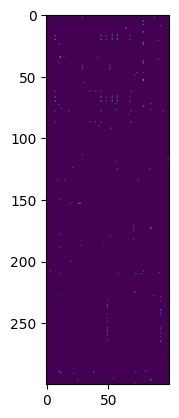

In [ ]:
# it does not help to try to visualize X
plt.imshow(X[100:400,200:300])

## Apply ML Algorithms for predicting the ratings

In [ ]:
# first step, we can use the whole data
# we need to designate a model
# C is 1/alpha for Ridge
model = LogisticRegression(C = 100, solver='saga',penalty='l2',max_iter=1000)

In [ ]:
# we need to fit the model on our data
model.fit(X,yb)
model.score(X,yb)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.967714528462192

In [ ]:
# we can compute the confusion matrix as well:
pd.DataFrame(data=cm(yb,model.predict(X)),columns=['at least 4 stars', 'less than 4 stars'],index=['at least 4 stars', 'less than 4 stars'])

,at least 4 stars,less than 4 stars
at least 4 stars,169,31
less than 4 stars,7,970


In [ ]:
model = SVC(kernel='rbf',gamma=0.1,C=2)
model.fit(X,yb)

SVC(C=2, gamma=0.1)

In [ ]:
model.score(X,yb)

0.9966015293118097

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# what we got is overfit
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,shuffle=True,random_state=1234)

In [ ]:
model = SVC(kernel='rbf',gamma=0.02,C=5)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7261146496815286

In [ ]:
def evaluation(h):
  gamma=h[0]
  C = h[1]
  model = SVC(kernel='rbf',gamma=gamma,C=C)
  kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1234)
  ev = cross_val_score(model,X,y,cv=kf,scoring='accuracy')
  return np.mean(ev)

In [ ]:
evaluation([0.03,6])

0.7264884832681442

In [ ]:
cm(yb,model.predict(X))

array([[147,  53],
       [  0, 977]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
prep1 = TfidfVectorizer()
X_raw = prep1.fit_transform(allreviews)
X = X_raw.toarray()

In [ ]:
X[10,X[10]!=0]

array([0.18617881, 0.18617881, 0.18617881, 0.18617881, 0.17594777,
       0.18617881, 0.18617881, 0.18617881, 0.18617881, 0.19439728,
       0.35189553, 0.18617881, 0.18617881, 0.11784695, 0.18617881,
       0.18617881, 0.37235762, 0.18617881, 0.18617881, 0.17594777,
       0.18617881, 0.18617881, 0.18617881, 0.18617881])

In [ ]:
X = X_raw

In [ ]:
model.fit(X,yb)
model.score(X,yb)

0.8827527612574342

In [ ]:
model = SVC(kernel='rbf',gamma=0.01,C=2)
model.fit(X,yb)

SVC(C=2, gamma=0.01)

In [ ]:
confusion_matrix(yb,model.predict(X))

array([[ 38, 398],
       [  0, 741]])

In [ ]:
# for the number of stars we say 5 star is a hit and less than 5 is a miss
yb = y.where(y==5, other=0).where(y<5, other=1)

In [ ]:
sum(yb)

741.0

In [ ]:
yb.shape

(1177,)

In [ ]:
yb

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1172    0.0
1173    0.0
1174    0.0
1175    0.0
1176    0.0
Name: reviews.rating, Length: 1177, dtype: float64

### Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc

Xtrain,Xtest,ytrain,ytest = tts(X,yb,random_state=123,test_size=0.25)
cls = LogisticRegression(random_state=123, solver='lbfgs')
cls.fit(Xtrain,ytrain)
ypred = cls.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
pd.DataFrame(cm, columns=['Not 5', '5'], index =['Not 5', '5'])

,Not 5,5
Not 5,41,67
5,20,167


In [ ]:
acc(ytest,ypred)

0.7050847457627119

In [ ]:
# the input features are based on the Bag of Words Model
# the input features matrix X is sparse

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=5,weights='distance')

In [ ]:
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
pd.DataFrame(cm, columns=['Not 5', '5'], index =['Not 5', '5'])

,Not 5,5
Not 5,65,43
5,60,127


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


cls = RandomForestClassifier(random_state=310, max_depth=100, n_estimators = 100)
cls.fit(Xtrain,ytrain)
ypred = cls.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
pd.DataFrame(cm, columns=['Not 5', '5'], index =['Not 5', '5'])

,Not 5,5
Not 5,45,63
5,14,173


In [ ]:
acc(ytest,ypred)

0.7389830508474576

### <font color='blue'> Application to the Wine Ratings Dataset </font>

In [2]:
# the first example uses only 1000 observations
wine_data = pd.read_csv('https://github.com/dvasiliu/AML/blob/main/Data%20Sets/winemagdata130kv2.csv?raw=true',quoting=2)
wines = wine_data[["description","points"]]
wines_subset = wines.sample(1000,random_state=1234).reset_index(drop=True)
corpus = []

In [4]:
reviews = wines_subset.description.values #

In [5]:
def fast_remove_stopwords(texts):

    stop_words = set(stopwords.words('english'))
    
    # Compile regex for efficiency (matches whole words only)
    pattern = r'\b(?:{})\b'.format('|'.join(stop_words))
    regex = re.compile(pattern, re.IGNORECASE)
    
    # Process all texts with a single function call
    return [regex.sub('', text) for text in texts]

In [6]:
def fast_preprocess(texts, lemmatize=True):
    
    # Fast text preprocessing function that handles:
    # - Lowercasing
    # - Punctuation removal
    # - Stopword removal
    # - Lemmatization (optional)
    
    # Arguments:
    #     texts: List of strings or single string to process
    #     stop_words: Set of stopwords (if None, uses NLTK English stopwords)
    #     lemmatize: Whether to perform lemmatization
    
    # Returns:
    #     Processed texts (list or string, matching input type)
    
    # Handle single string input
    single_input = isinstance(texts, str)
    if single_input:
        texts = [texts]
    
    
    
    stop_words = set(stopwords.words('english'))
    
    # Create translator for punctuation removal (faster than regex for this task)
    translator = str.maketrans('', '', string.punctuation)
    
    # Initialize lemmatizer if needed
    lemmatizer = WordNetLemmatizer() if lemmatize else None
    
    processed_texts = []
    for text in texts:
        # Lowercase
        text = text.lower()
        
        # Remove punctuation
        text = text.translate(translator)
        
        # Tokenize (needed for both stopword removal and lemmatization)
        tokens = text.split()
        
        # Remove stopwords
        tokens = [token for token in tokens if token not in stop_words]
        
        # Lemmatize if requested
        if lemmatize:
            tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        # Rejoin into text
        processed_texts.append(' '.join(tokens))
    
    # Return in same format as input
    return processed_texts[0] if single_input else processed_texts

In [8]:
%time prep_reviews = fast_preprocess(reviews)

CPU times: user 69.3 ms, sys: 1.39 ms, total: 70.7 ms
Wall time: 70 ms


In [39]:
prep_reviews[1]

'ripe fruity wine smooth still structured firm tannin filled juicy red berry fruit freshened acidity already drinkable although certainly better 2016'

In [40]:
embedding = TfidfVectorizer()
x = embedding.fit_transform(prep_reviews)

In [ ]:
# this is the trick: we included a fakeword at the end of each row for the reviews

## Binning the Classes

In [41]:
pts = wine_subset.points
y = pts.copy().values
y[pts>=92] = 4
y[(pts>=90) & (pts<=91)] = 3
y[(pts>=88) & (pts<=89)] = 2
y[(pts>=86) & (pts<=87)] = 1
y[(pts>=80) & (pts<=85)] = 0

Message: If we make fewer categories we can see an improvement in prediction.

In [54]:
pts = wine_subset.points
y = pts.copy().values
y[pts>=93] = 2
y[(pts>=88) & (pts<=92)] = 1
y[(pts<=87)] = 0


## Assemble the preprocessed data

In [42]:
df = pd.DataFrame(data=prep_reviews,columns = ['Reviews'])
df['Category'] = y

In [43]:
df.head()

,Reviews,Category
0,aroma include tropical fruit broom brimstone d...,1.0
1,ripe fruity wine smooth still structured firm ...,1.0
2,tart snappy flavor lime flesh rind dominate gr...,1.0
3,pineapple rind lemon pith orange blossom start...,1.0
4,much like regular bottling 2012 come across ra...,1.0


In [44]:
# here we can make a TF-IDF approach
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['Reviews'])

In [ ]:
x.shape

(129971, 42813)

In [55]:
model = LogisticRegression(C=100,solver='saga')
model.fit(x,y)

/home/daniel/work_p132/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, solver='saga')

In [56]:
model.score(x,y)

0.8885058974694355

In [58]:
pd.DataFrame(data=cm(y,model.predict(x)),index=np.arange(0,3),columns=np.arange(0,3))

,0,1,2
0,45362,6117,14
1,5290,59575,950
2,22,2098,10543


In [63]:
from sklearn.model_selection import train_test_split

In [69]:
# let's do a train/test split of the whole data
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=123)

In [65]:
model = LogisticRegression(solver='lbfgs',C=10,max_iter=10000)

In [66]:
model.fit(xtrain,ytrain)

LogisticRegression(C=10, max_iter=10000)

In [70]:
model.score(xtest,ytest)

0.7561838815156761

In [72]:
pd.DataFrame(data=cm(ytest,model.predict(xtest)),index=['0','1','2'],columns=['0','1','2'])

,0,1,2
0,8052,2209,17
1,2157,10441,606
2,27,1322,1164


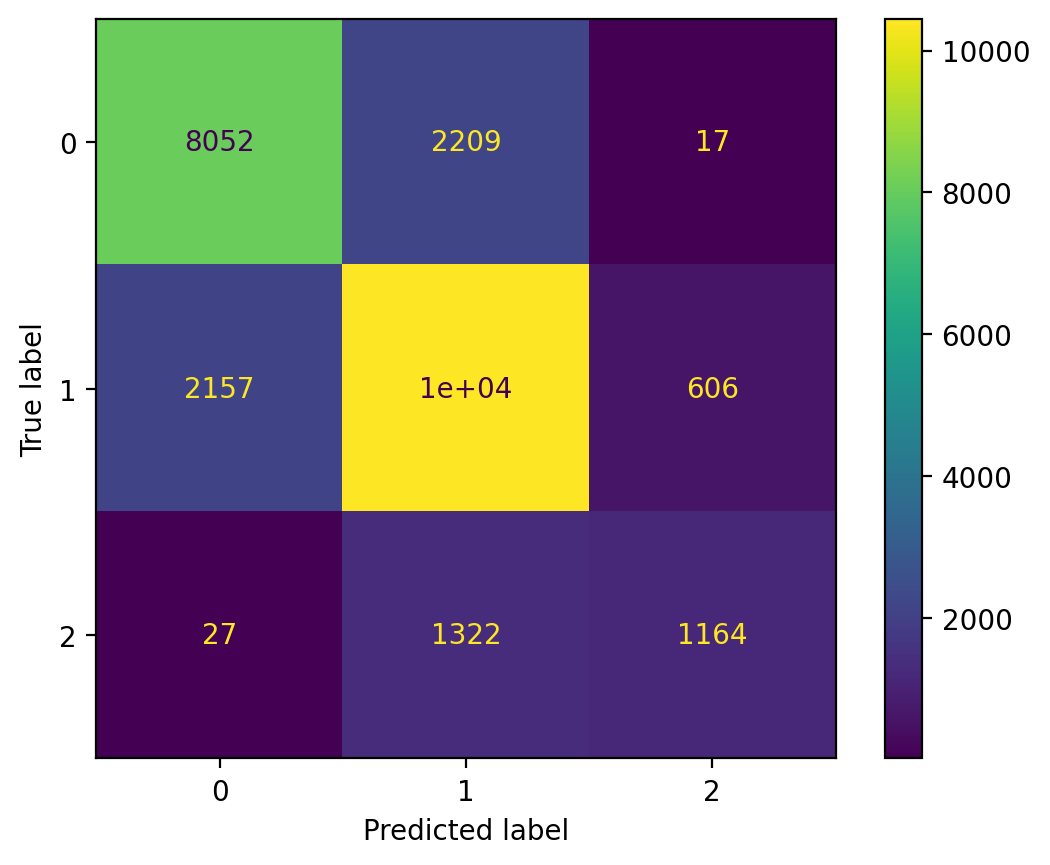

In [74]:
CMD(cm(ytest,model.predict(xtest))).plot()
plt.show()